<div class="alert alert-block alert-danger">  
<h2><center><strong>Importing Python Libraries 📕 📗 📘 📙</strong></center></h2>
        
</div>

In [1]:
import numpy as np  # library for numeric calculations   
import pandas as pd # library for reading data 
import seaborn as sns # library for plots 
import matplotlib.pyplot as plt # library for plots 
from sklearn.metrics import mean_squared_error # library for evaluation  mse 
from math import sqrt  # library for evaluation  rmse
from sklearn.metrics import mean_absolute_error # library for evaluation mae 
from sklearn.preprocessing import MinMaxScaler #for data normalization
from keras.layers import Dense, Dropout # library for ANN
from keras.optimizers import Adam # library for ANN 
from keras.layers import Activation # library for ANN 
from keras.models import Sequential # library for ANN 
from keras.layers import Dense, Dropout # library for ANN

import warnings # library to avoid system erros 
warnings.filterwarnings("ignore")  # library to avoid system erros 

<div class="alert alert-block alert-danger">  
<h2><center><strong>Loading data 📂</strong></center></h2>
        
</div>

In [2]:
data = pd.read_excel("Data.xlsx")

In [3]:
col=['Friction', 'Hub','Yield point','Soldification', 'x-position','max force','max plasctic','max stress']
data.columns=col

<div class="alert alert-block alert-info">  
<h2><center><strong>Now its time to analyse all data</strong></center></h2>
        
</div>

#### Five top records of data

In [4]:
data.head()

,Friction,Hub,Yield point,Soldification,x-position,max force,max plasctic,max stress
0,0.087333,-23.734797,378.96838,0.216275,16.019692,-88418.969,0.170637,753.02191
1,0.112667,-23.945203,364.83162,0.245743,16.893973,-1720949.400,0.168690,751.46106
2,0.142081,-23.808332,348.41877,0.226572,17.516778,-108039.340,0.168020,750.84351
3,0.064685,-23.912855,344.15463,0.231887,14.884369,-223941.720,0.168476,739.08862
4,0.092452,-23.781538,420.74415,0.210471,15.963257,-99625.875,0.170323,749.81940


#### Five last records of data

In [5]:
data.tail()

,Friction,Hub,Yield point,Soldification,x-position,max force,max plasctic,max stress
244,0.163850,-24.031867,374.19646,0.218775,19.407285,-4323948.000,0.301378,759.98816
245,0.079268,-23.758655,371.39644,0.224817,13.802264,-93814.227,0.186402,752.34454
246,0.104921,-23.973700,356.68827,0.262010,15.094831,-2021064.800,0.168310,750.00299
247,0.132044,-23.826690,334.96855,0.233742,16.478554,-134428.530,0.171130,749.95685
248,0.177405,-23.643094,406.53944,0.213710,16.158946,-79631.813,0.169566,753.34955


#### Coloumns/features in data

In [6]:
data.columns

Index(['Friction', 'Hub', 'Yield point', 'Soldification', 'x-position',
       'max force', 'max plasctic', 'max stress'],
      dtype='object')

#### Length of data

In [7]:
print('lenght of data is', len(data))

lenght of data is 249


#### Shape of data

In [8]:
data.shape

(249, 8)

#### Data information

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Friction       249 non-null    float64
 1   Hub            249 non-null    float64
 2   Yield point    249 non-null    float64
 3   Soldification  249 non-null    float64
 4   x-position     249 non-null    float64
 5   max force      249 non-null    float64
 6   max plasctic   249 non-null    float64
 7   max stress     249 non-null    float64
dtypes: float64(8)
memory usage: 15.7 KB


#### Data types of all coloumns

In [10]:
data.dtypes

Friction         float64
Hub              float64
Yield point      float64
Soldification    float64
x-position       float64
max force        float64
max plasctic     float64
max stress       float64
dtype: object

#### Checking Null values / missing values

In [11]:
np.sum(data.isnull().any(axis=1))

0

#### Counts of missing values in each column

In [12]:
data.isnull().sum()

Friction         0
Hub              0
Yield point      0
Soldification    0
x-position       0
max force        0
max plasctic     0
max stress       0
dtype: int64

#### Rows and columns in the dataset

In [13]:
print('Count of columns in the data is:  ', len(data.columns))

Count of columns in the data is:   8


In [14]:
print('Count of rows in the data is:  ', len(data))

Count of rows in the data is:   249


# ------------------------------------------------------------------------------------------------------

# Data Visualization

# ------------------------------------------------------------------------------------------------------

### max force values plot

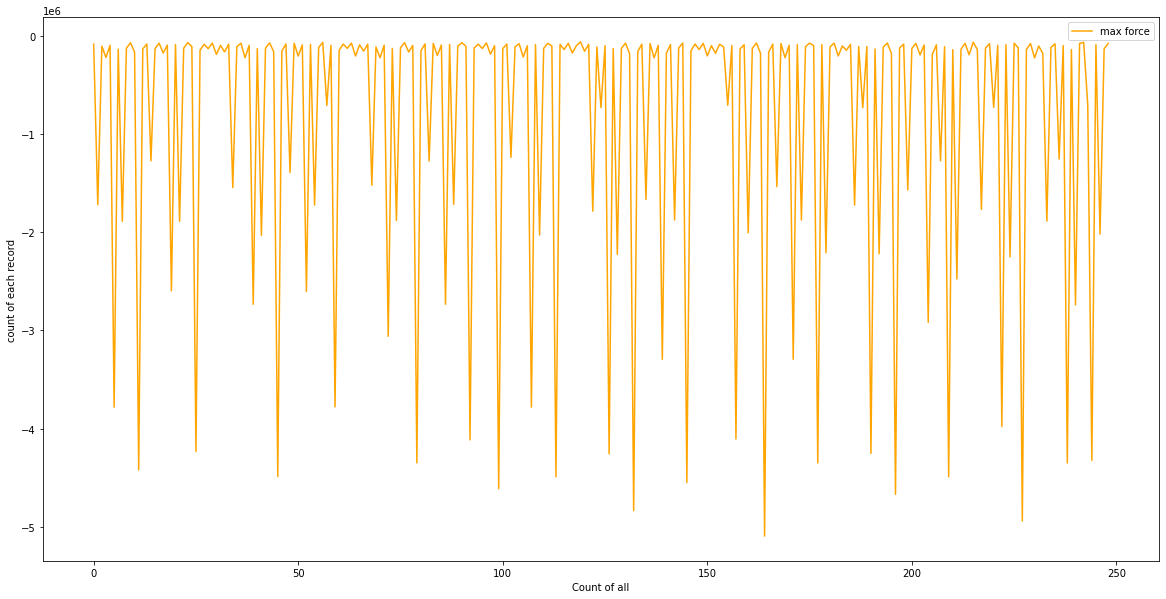

In [15]:
plt.figure(figsize=(20, 10)) #setting the width and height of the plot 
plt.subplot(1,1,1) #plot setting 
plt.plot(data.index, data['max force'].values,color='orange',label='max force') # plotting max force 
plt.xlabel('Count of all') # x axis 
plt.ylabel('count of each record') # y axis 
plt.legend(loc='best') #legend name 
plt.show() # showing the plot 

### max stress values plot

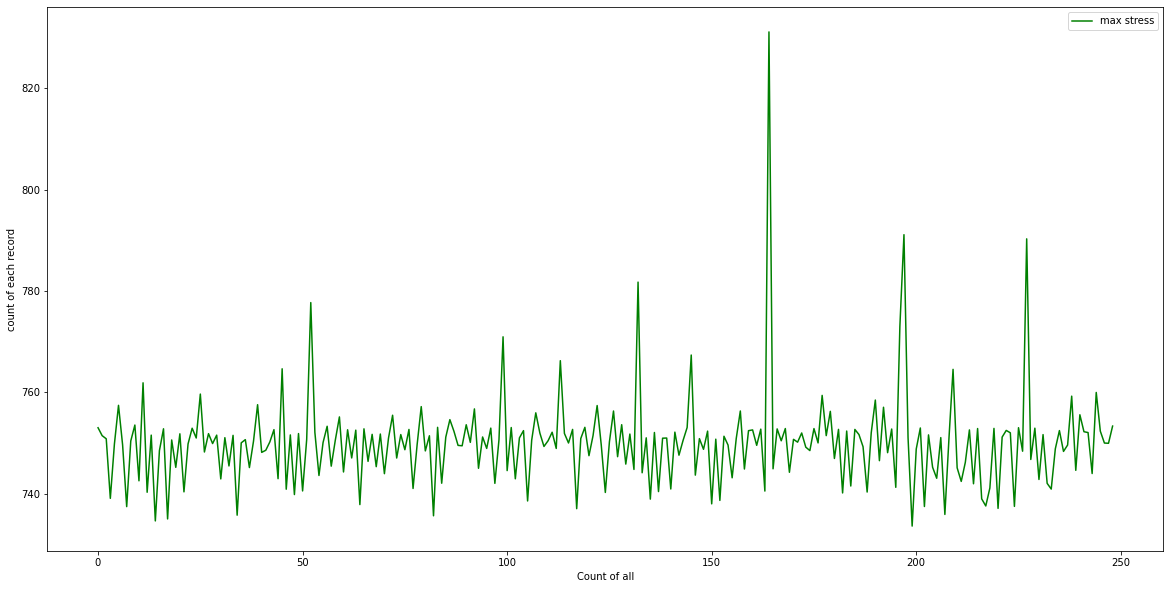

In [16]:
plt.figure(figsize=(20, 10)) #setting the width and height of the plot 
plt.subplot(1,1,1) #plot setting 
plt.plot(data.index, data['max stress'].values,color='green',label='max stress') # plotting max stress
plt.xlabel('Count of all') # x axis 
plt.ylabel('count of each record') # y axis 
plt.legend(loc='best') #legend name 
plt.show() # showing the plot 

### Taking input features of data

In [17]:
X=data.drop(columns=['max force','max stress']) #taking input features

### Taking target as output Max force and Max Stress

In [18]:
y=data[['max force','max stress']] # output  

<div class="alert alert-block alert-danger">  
    <p>"</p>
    <p>"</p>
     <p>"</p>
    <p>"</p>
<h1><center><strong>Split the data into training 80% and testing 20%</strong></center></h1>
 <p>"</p>
    <p>"</p> <p>"</p>
    <p>"</p>
        
</div>

In [19]:
X_train = X[:int(0.8*(len(X)))] # training input features split 
X_test = X[int(0.8*(len(X))):]  # testing input features split 
y_train = y[:int(0.8*(len(y)))]  # training output split 
y_test = y[int(0.8*(len(y))):] # testing output split 

### Applying the normalization on the data

In [20]:
scaler = MinMaxScaler(feature_range=(0,1))
y_test1=y_test.copy()
y_train1=y_train.copy()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)
y_train=np.array(y_train)
y_train= scaler.fit_transform(y_train)
y_test=np.array(y_test)
y_test= scaler.fit_transform(y_test)

# -----------------------------------------------------------------------------------------------------------

<h1><center> Modelling </center></h1>

# -----------------------------------------------------------------------------------------------------------

# ANN Model

In [21]:
def ANN_model(): # Function of ANN model
    ANN = Sequential() # calling sequancial for training 
    ANN.add(Dense(64,input_shape=(X_train.shape[1],))) # taking the inputs #layer 1
    ANN.add(Dropout(0.3)) #dropouts to drop the other than neccessory nodes #layer 2
    ANN.add(Activation('relu')) # for the outputs of next layer #layer 3
    ANN.add(Dense(32)) # for the outputs of next layer  #layer 4
    ANN.add(Dropout(0.5)) #dropouts to drop the other than neccessory nodes again #layer 5
    ANN.add(Activation('relu')) # for the outputs of next layer #layer 6
    ANN.add(Dense(2)) # for the outputs of next layer#layer 7
    return ANN #return the ANN with results 
ANN_model=ANN_model() #calling the above function 

### Training the ANN

In [22]:
ANN_model.compile(optimizer=Adam(), loss='mean_squared_error') #adding the loss and optimizer to look at the performance of the model
ANN_model.fit(X_train, y_train, epochs=50, batch_size=10) #start training with 50 epochs and batch size of 10 on training data

Epoch 1/50
20/20 [==============================] - 1s 3ms/step - loss: 0.4128
Epoch 2/50
20/20 [==============================] - 0s 2ms/step - loss: 0.1949
Epoch 3/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0935
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0858
Epoch 5/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0851
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0673
Epoch 7/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0655
Epoch 8/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0637
Epoch 9/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0592
Epoch 10/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0655
Epoch 11/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 12/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0611
Epoch 13/50
20/20 [==============================

> ## Model paramters used:
    >- Loss function (mean_squared_error)
    >- Epochs (50)
    >- Batch size (10)
    >- Number of layers (7)
   > - Optimizer (Adam)
    >- Dropout (0.3)
    >- Activation function (Relu)

# Evaluation Measures on Test data

In [23]:
y_pred_test1=ANN_model.predict(X_test) # tetsing trained model on test data

2/2 [==============================] - 0s 3ms/step


### MAE (Mean absolute error)

In [24]:
test_MAE1=mean_absolute_error(y_test,y_pred_test1) # calculating the mae score
print('MAE: ', round(test_MAE1,5)) #pritng the results 

MAE:  0.11193


### MSE (Mean squared error)

In [25]:
test_mse1=mean_squared_error(y_test,y_pred_test1) # calculating the mse score
print('MSE: ', round(test_mse1,5)) #printing the results 

MSE:  0.01841


### RMSE (Root mean squared error)

In [26]:
test_rmse1=np.sqrt(test_mse1) # calculating the rmse score
print('RMSE: ', round(test_rmse1,5)) #pritng the results 

RMSE:  0.13569


# -----------------------------------------------------------------------------------------------------------